C:\Users\Utente\AppData\Local\Temp\ipykernel_52656\4284797092.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '175343.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc['Python', dim] = total_time
C:\Users\Utente\AppData\Local\Temp\ipykernel_52656\4284797092.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '17406.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc['Python', dim] = total_time
C:\Users\Utente\AppData\Local\Temp\ipykernel_52656\4284797092.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '187.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc['Python', dim] = total_time


           10KB        1GB     100MB     1MB
Python        0  175343.75  17406.25   187.5
MapReduce  2490  626590.00  60450.00  4230.0


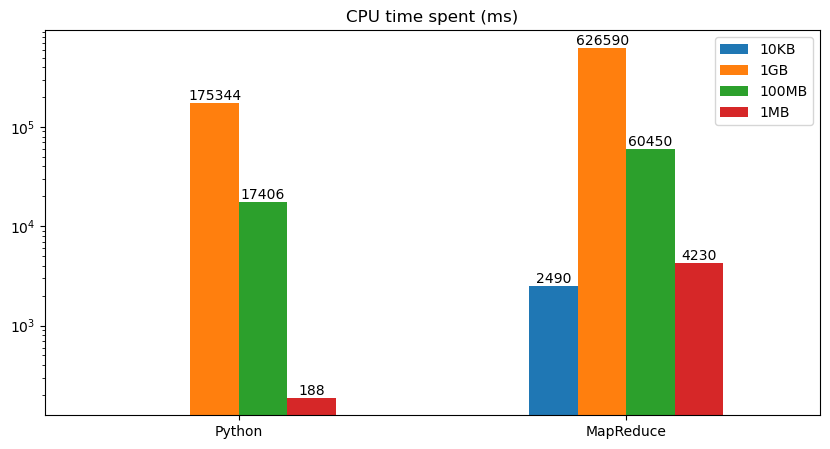

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../python')
from letterFrequency import process_file

run_id = 6
file_dims = ['10KB', '1GB', '100MB', '1MB']
df = pd.DataFrame(index=['Python', 'MapReduce'], columns=file_dims)
df = df.fillna(0)

for dim in file_dims:
    total_time = process_file(dim)
    df.loc['Python', dim] = total_time
    mr_file_path = f'../resources/performance_analysis/output_{run_id}/inmappercombiner_1/{dim}/log.txt'
    with open(mr_file_path, 'r') as file:
        for line in file:
            if 'CPU time spent (ms)' in line:
                line = line.split('=')
                df.loc['MapReduce', dim] += float(line[1].strip())
print(df)
ax = df.plot(kind='bar', figsize=(10, 5), title='CPU time spent (ms)', rot=0)
ax.set_yscale('log')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()